# Support Vector Machines

Support Vector Machines(SVMs) are a set of supervised learning methods and are used for classification, regression and outliers detections. Their advataged are:

* Effective in high dimensional spaces
* Its memory efficient, becuase they use a subset of training points in the decision function.


In [2]:
#import libraries
#NOTE: for different clustering algoriths I will append libraries before startign the cifferent clustering process
import numpy as np #mathematical operations
import matplotlib.pyplot as plt # plotting library
import warnings # ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib.colors import ListedColormap
import seaborn as sns

from pandas import read_csv #read the file with pandas
file = 'Avocado.csv'

In [3]:
#read the file and present first 3 rows
data_raw = read_csv(file)
data_raw.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [4]:
#select desired data and its values and transform in matrix = NxM, N being 2 with data x and y and M is the len(x_col.values).
y_col = 'Total Bags'; y = data_raw[y_col].values
x_col = 'Total Volume'; x = data_raw[[x_col]].values
c_map = 'Small Bags'

Text(0.5, 1.0, 'Random dependacy')

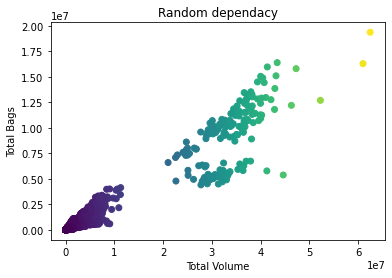

In [5]:
#plot data, so we get the general view of it. 
plt.scatter(x,y, c = x , cmap='viridis')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Random dependacy')

## GaussianNB

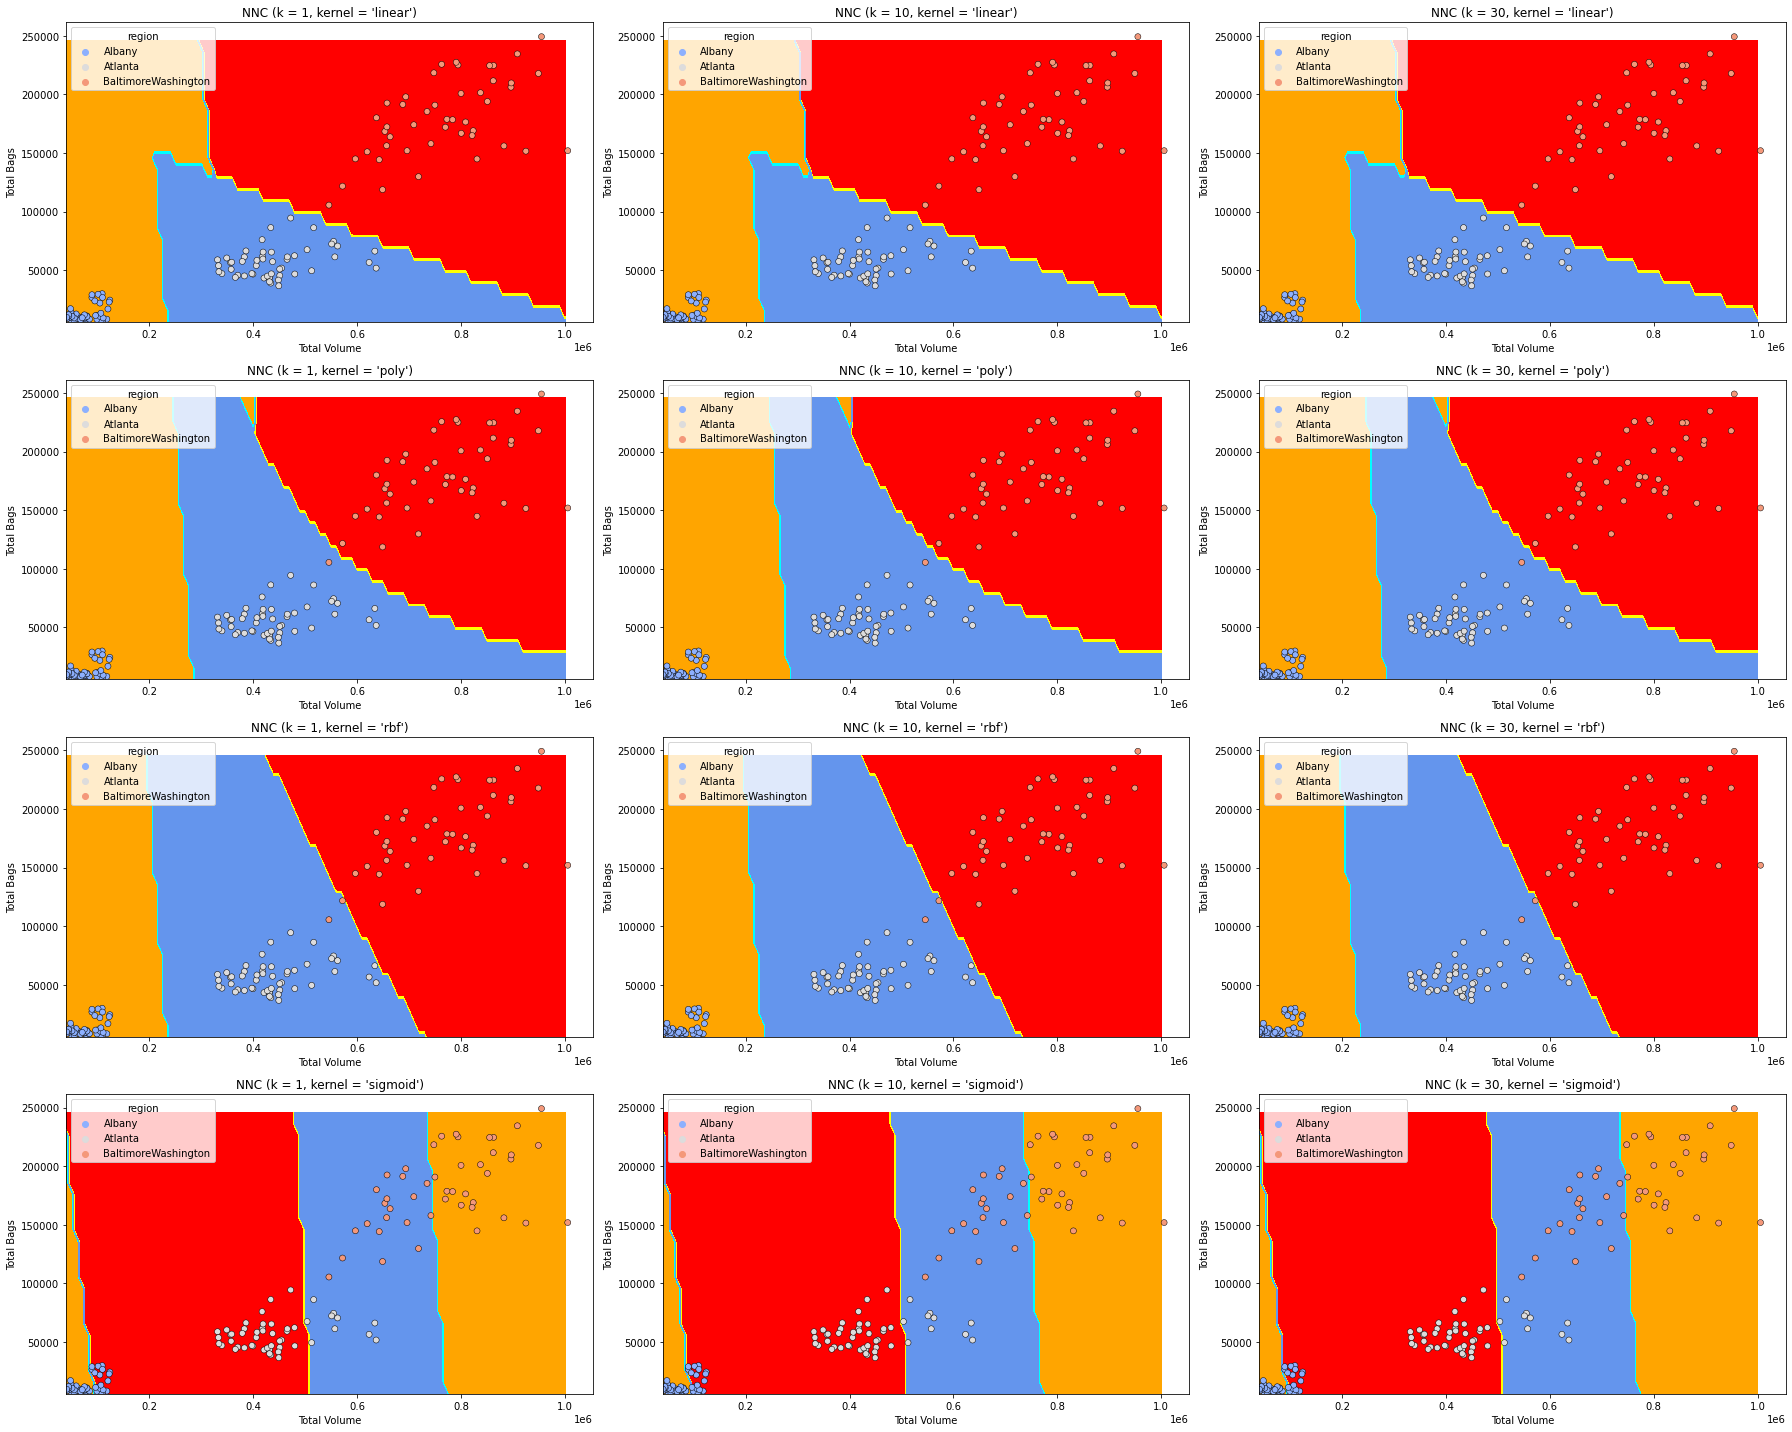

In [49]:
from sklearn.svm import SVC


lab_enc = LabelEncoder()


y_col = 'Total Bags'; y = data_raw[y_col].values
x_col = 'Total Volume'; x = data_raw[[x_col]].values   
data_new = data_raw[data_raw[y_col] != 0]
data_s = data_new[[x_col, y_col]].values[0:150] #250 data. We have too many regions and if we include every region its a mess. 

region = data_new['region'][0:150]
#set numbers for different regions for a better fit. 
target = lab_enc.fit_transform(region)
#get unique value from targets
c = np.unique(target)
h = 10000  # step size in the mesh
#if we have lower h, or h < 100, we have to use logarithmic values at x_min,x_max, y_min, y_max, 
#otherwise we overload our processor. With higher step size np.log is not necessary.  
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'yellow', 'red']) 
neigh = [1, 10, 30,1, 10, 30,1, 10, 30,1, 10, 30]
fig, axs  = plt.subplots(int(len(neigh)/3), int(len(neigh)/4), figsize=(25,20))
int(len(neigh)/4)
axs = axs.ravel()

x_min, x_max = (data_s[:, 0].min() - 1), (data_s[:, 0].max() + 1)
y_min, y_max = (data_s[:, 1].min() - 1), (data_s[:, 1].max() + 1)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    
for i, j in zip(neigh, range(0, len(neigh))):
    if j < 3: 
        kernel = 'linear'
    elif j < 6: 
        kernel = 'poly'
    elif j < 9: 
        kernel = 'rbf'
    elif j < 12: 
        kernel = 'sigmoid'
    clf = SVC(kernel = kernel)
    clf.fit(data_s, target)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[j].contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x=data_s[:, 0], y=data_s[:, 1],hue = region, ax = axs[j],
                    palette=sns.color_palette('coolwarm', n_colors=len(c)), alpha=1.0, edgecolor="black")
    axs[j].set_xlabel(x_col)
    axs[j].set_ylabel(y_col)
    axs[j].set_title("NNC (k = %i, kernel = '%s')" % (i, kernel)) 
plt.tight_layout()

# Conclusion

As we see the rbf kernel gets us the most satisfying prediction. All though linear and poly get there as well. 